In [1]:
#importing necessary stuff
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
import functools

#trying to make it the latex font stuff
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rc('text', usetex=True)

In [2]:
#setting up values for constants
eV = 1.6022 * 10 ** (-19) #Joules
a = 10 * eV
L = 5 * 10 ** (-10) #meters
M = 9.1094 * 10 ** (-31) #kilograms
hbar = 6.62607 * 10 ** (-34) / (2* np.pi) #Joules / second

In [3]:
print('part b')
#defining H(m,n)
def H(m,n):
    #making cases for the 3 cases of m and n relations
    if m%2 != n%2:
        #for m and n not equal to one another, with one even and the other odd
        val = -(8 * a * m * n) / (np.pi**2 * (m**2 - n**2)**2)
        return val
    elif m == n:
        #for m and n equal to each other
        val = (a/2) + ((n * np.pi * hbar)**2)/(2*M*(L**2))
        return val
    else:
        #for m and n not equal to one another, with both being either even or odd
        return 0

part b


In [4]:
print('part c')
#making a matrix version of this monstrosity
nc = 10
Hn10 = np.zeros((nc,nc))

#filling in the values for the matrix
for i in range(0, nc):
    for j in range(0, nc):
        Hn10[i,j] = H(i+1,j+1) 

part c


In [5]:
#determining the eigenvalues for the matrix, converting from Coulombs to # of electrons
eigenlist10 = eig(Hn10)[0] * (6.2415 * (10 ** (18)))
esort10 = np.sort(eigenlist10)
print('the 10 eigenvalues for the 10 x 10 matrix are listed in ascending order:')
print(esort10)

the 10 eigenvalues for the 10 x 10 matrix are listed in ascending order:
[  5.83641932  11.18114227  18.66291636  29.14418658  42.65501838
  59.1851465   78.72918429 101.28523358 126.85105129 155.55490412]


In [6]:
print('part d')
#making a matrix version of this monstrosity
nd = 100
Hn100 = np.zeros((nd,nd))

#filling in the values for the matrix
for i in range(0, nd):
    for j in range(0, nd):
        Hn100[i,j] = H(i+1,j+1) 

part d


In [7]:
#determining the eigenvalues for the matrix, converting from Coulombs to # of electrons
eigenlist100 = eig(Hn100)[0] * (6.2415 * (10 ** (18)))
esort100 = np.sort(eigenlist100)
print('the first 10 eigenvalues for the 100 x 100 matrix are listed in ascending order:')
print(esort100[:10])

the first 10 eigenvalues for the 100 x 100 matrix are listed in ascending order:
[  5.83641892  11.18114095  18.66291449  29.14417778  42.65500926
  59.18509392  78.72913246 101.28460263 126.85021893 155.42527783]


In [8]:
print('part e')
#making the necessary lists for 
evals, evecs = eig(Hn100)
NRG_lvls = np.sort(evals)[:3]

#finding where the eigenvectors are in the lists
lg = np.where(evals == NRG_lvls[0])
l1 = np.where(evals == NRG_lvls[1])
l2 = np.where(evals == NRG_lvls[2])
print('the location for the groundstate eigenvector, along with the 1st and 2nd excited states is:')
print(lg,l1,l2)

#assigning the eigenvectors
vg = evecs[:,66]
v1 = evecs[:,67]
v2 = evecs[:,68]

part e
the location for the groundstate eigenvector, along with the 1st and 2nd excited states is:
(array([66]),) (array([67]),) (array([68]),)


In [9]:
def psi(vector , x):
    vlist = [vector[n] * np.sin((n+1) * x * np.pi / L) for n in range(0, 100)]
    val = functools.reduce(lambda k,l: k+l, vlist)
    return val

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


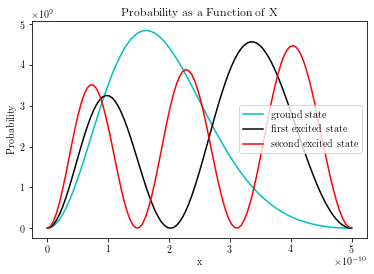

In [10]:
#making some lists for plotting stuff
xg = []
yg = []

x1 = []
y1 = []

x2 = []
y2 = []

#making for loops to fill in the lists
for i in np.linspace(0,L,100):
    p = psi(vg, i)**2 / (2.5 * 10 ** (-10))
    xg.append(i)
    yg.append(p)
    

for i in np.linspace(0,L,100):
    p = psi(v1, i)**2 / (2.5 * 10 ** (-10))
    x1.append(i)
    y1.append(p)
    
for i in np.linspace(0,L,100):
    p = psi(v2, i)**2 / (2.5 * 10 ** (-10))
    x2.append(i)
    y2.append(p)


#making plots now
plt.plot(xg,yg, label = "ground state", color = 'c')
plt.plot(x1,y1, label = "first excited state", color = 'k')
plt.plot(x2,y2, label = "second excited state", color = 'r')

plt.ion
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Probability as a Function of X')
plt.legend()
plt.show()

In [11]:
print('checking to see if the functions are normalized...')
tot = 0
for i in range(99):
    tot += 0.5 * np.linspace(0, 5e-10, 100, retstep=True)[1] * (yg[i] + yg[i+1])
print('the total probability is:',tot, 'for the ground state')

tot = 0
for i in range(99):
    tot += 0.5 * np.linspace(0, 5e-10, 100, retstep=True)[1] * (y1[i] + y1[i+1])
print('the total probability is:',tot, 'for the first excited state')

tot = 0
for i in range(99):
    tot += 0.5 * np.linspace(0, 5e-10, 100, retstep=True)[1] * (y2[i] + y2[i+1])
print('the total probability is:',tot, 'for the second excited state')

checking to see if the functions are normalized...
the total probability is: 1.0 for the ground state
the total probability is: 1.0 for the first excited state
the total probability is: 0.9999999999999997 for the second excited state
